# Calculating expectation value of position for the QHO

We will use python to plot and examine some properties of the QHO.  First, I'm going to import some functions (specifically the Hermite polynomials and the factorial), define $\sqrt{\pi}$ and the appropriate normalisation $N_n(\alpha)$, then set up the eigenfunctions, which will live in a function called `phi`.  This is directly analogous to $\phi_n(x)$ in position representation.

In [31]:
%matplotlib inline
import matplotlib.pyplot as pl
from scipy.special import hermite
from scipy.misc import factorial
from numpy import linspace, sqrt, exp, mat, zeros
from math import pi
root_pi = sqrt(pi)
def N(n, alpha):
    return sqrt(alpha / (root_pi * (2.0**n) * factorial(n)))
def phi(x,n,alpha):
    return N(n,alpha) * hermite(n)(alpha * x) * exp(-0.5 * alpha**2 * x**2)

Now I'm going to plot a particular state; in Dirac notation:
$$
\vert \psi \rangle = c_1 \vert \phi_0 \rangle + c_2 \vert \phi_1 \rangle
$$
where we could have used the notation $\vert 0 \rangle$ (etc) for the eigenvectors.  We define an array of points in real-space from -5 to 5 (and store this in x), then set the eigenstates and coefficients, and plot the function.

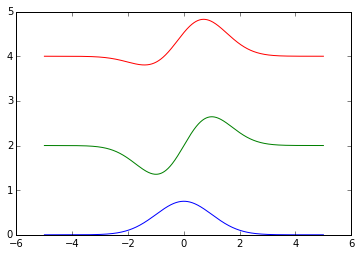

In [71]:
x = linspace(-5.0,5.0,1000)
n1=0
n2=1
alpha=1.0
c1 = 1.0
c2 = 1.0
norm = sqrt(c1*c1 + c2*c2)
c1 = c1/norm
c2 = c2/norm
# Plot - I add 2.0 and 4.0 so that the graphs are offset
pl.plot(x,phi(x,n1,alpha)+0.0)
pl.plot(x,phi(x,n2,alpha)+2.0)
pl.plot(x,c1*phi(x,n1,alpha)+c2*phi(x,n2,alpha)+4.0)

Notice how the second argument to `plot` is actually the function definition - you could play with this if you liked, and see what other functions you could plot.  You can also have more than one call to plot.

We can perform integrals numerically in python: `quad` from the `scipy.integrate` package is the simplest way to do this.  The syntax below with `lambda` is more complex than I'm qualified to teach, but it basically means that the function defined after the colon is called for differing values of x by `quad`.  

Here we are going to calculate the expectation value of x for $\vert \psi \rangle$ numerically, using position representation:
$$
\langle \hat{x} \rangle = \langle \psi \vert \hat{x} \vert \psi \rangle
$$
Notice how, when we call the integral, we're relying on the eigenfunctions being real (complex arithmetic is perfectly possible in python, but we'll come to that later !).

In [72]:
from scipy.integrate import quad
quad(lambda x: (c1*phi(x,n1,alpha)+c2*phi(x,n2,alpha))*x*(c1*phi(x,n1,alpha)+c2*phi(x,n2,alpha)),-5.0,5.0)


(0.7071067811300554, 9.243528753294546e-11)

Compare this result to the plot above; it looks reasonable.  By combining the two states, we have moved the expectation value away from zero (which is where it will be for each eigenstate).  This can be calculated too - see below for $\langle 0 \vert \hat{x} \vert 0 \rangle$. (Notice that the return value has two parts - the second part is an estimate of the error from the numerical integration.)

In [73]:
quad(lambda x: phi(x,n1,alpha)*x*phi(x,n1,alpha),-5.0,5.0)


(0.0, 5.641264515180258e-15)

We're now going explore another way of finding the expectation value for operators, using matrices.  We can only work with finite matrices, so we'll choose a particular size (defined in the variable `matsize`), and then set up the matrix for the operator x, which has elements:
$$
\langle i \vert \hat{x} \vert j \rangle = X_{ij} = \frac{1}{\sqrt{2}\alpha}\left(\sqrt{j+1}\delta_{i,j+1} + \sqrt{j}\delta_{i,j-1}\right)
$$
(note that here and above I'm only defining $\alpha$).  So we first define `m` to be a matrix of the appropriate size (in the variable `matsize`), and then set the elements.  We iterate over i and j (in python we start from zero so we correspond directly to the QHO eigenstates).

In [74]:
matsize = 6
m = mat(zeros((matsize,matsize)))
for i in range(matsize):
    for j in range(matsize):
        if i==(j+1):
            m[i,j] = sqrt(i)/(alpha*sqrt(2.0))
        elif i==(j-1):
            m[i,j] = sqrt(i+1)/(alpha*sqrt(2.0))
        else:
            m[i,j] = 0.

We'll also need to display matrices, so I'll set up a function to do that (`printmat`), and then call it to display `m`.  Notice that it needs to be passed the matrix and the matrix size.

In [75]:
def printmat(A,sizei,sizej):
    for i in range(sizei):
        for j in range(sizej):
            print "%8.5f" % (A[i,j]),
        print

printmat(m,matsize,matsize)

 0.00000  0.70711  0.00000  0.00000  0.00000  0.00000
 0.70711  0.00000  1.00000  0.00000  0.00000  0.00000
 0.00000  1.00000  0.00000  1.22474  0.00000  0.00000
 0.00000  0.00000  1.22474  0.00000  1.41421  0.00000
 0.00000  0.00000  0.00000  1.41421  0.00000  1.58114
 0.00000  0.00000  0.00000  0.00000  1.58114  0.00000


How do we find the expectation value of x in the state $\vert\psi\rangle$ that we've set up above ? We'll need to define the state (we put it into a variable `psicol` which is a `matsize x 1` matrix - also known as a column vector), and then do some matrix-vector multplies.

In [76]:
psicol = mat(zeros((matsize,1)))
psicol[n1,0] = c1
psicol[n2,0] = c2
printmat(psicol,matsize,1)

 0.70711
 0.70711
 0.00000
 0.00000
 0.00000
 0.00000


So you can see that we've created a column vector `psicol` (which we're treating as a matrix with one column) and have set the first two coefficients to the appropriate values for our state.  Now we need to calculate $\langle \psi\vert \hat{x}\vert\psi\rangle$; we can create the bra using the transpose method of a matrix: `psicol.T`.  We then multiply out, which will give us what python thinks is a 1x1 matrix.

In [77]:
psicol.T*m*psicol

matrix([[ 0.70710678]])

Notice how the two calculations have given us the same result (a reassuring consistency check !).  We could create other states for $\vert \psi \rangle$ trivially by changing the coefficients (always ensuring that they're normalised), and explore the expectation values for those (in fact, you probably don't need python to do that, though it's easier).  We could also go beyond six elements (or below six elements - see what happens if you take `matsize` as low as two, and also look at the output from just evaluating `m*psicol`).

We can also calculate the expectation value of higher powers of $\hat{x}$ almost trivially, as we have the operator represented as the matrix `m`:

In [78]:
x2 = psicol.T*(m*m)*psicol
x3 = psicol.T*(m*m*m)*psicol
x4 = psicol.T*(m*m*m*m)*psicol
print x2,x3,x4

[[ 1.]] [[ 1.06066017]] [[ 2.25]]


To create the matrix representations of the operator to some power, we just do matrix multiplications (remember that, as this is a finite matrix, there will be some errors).  We could also work out the elements of the operator to the appropriate power, and set this up as a matrix.  We can see that the function $\vert \psi \rangle$ has non-zero values for the third and fourth powers, which indicates that it is skewed (to the positive x axis - shown by positive third power) and that it is bimodal (has more than one hump !).  If you test a different column (say trying the first and third states) you should find zero skewness.